## 프로젝트 기반 빅데이터 서비스 솔루션 개발 전문 과정

#### 교과목명 : 머신러닝알고리즘 이해 및 활용
- 평가일 : 03.10
- 성명 : 정현우
- 점수 : 70

Q1. iris data를 불러와서 아래 사항을 수행하세요.(15점)

- 결정트리 모델을 시각화하고 주요한 인사이트를 기술하세요.(tree.plot_tree or tree.export_graphviz 이용)
- Feature importance를 추출하고 시각화하세요.

### Q1

[Text(0.3, 0.9285714285714286, 'petal length (cm) <= 2.35\ngini = 0.667\nsamples = 120\nvalue = [41, 40, 39]\nclass = setosa'),
 Text(0.2, 0.7857142857142857, 'gini = 0.0\nsamples = 41\nvalue = [41, 0, 0]\nclass = setosa'),
 Text(0.4, 0.7857142857142857, 'petal length (cm) <= 4.75\ngini = 0.5\nsamples = 79\nvalue = [0, 40, 39]\nclass = versicolor'),
 Text(0.3, 0.6428571428571429, 'gini = 0.0\nsamples = 35\nvalue = [0, 35, 0]\nclass = versicolor'),
 Text(0.5, 0.6428571428571429, 'petal width (cm) <= 1.75\ngini = 0.201\nsamples = 44\nvalue = [0, 5, 39]\nclass = virginica'),
 Text(0.2, 0.5, 'petal length (cm) <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]\nclass = versicolor'),
 Text(0.1, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]\nclass = versicolor'),
 Text(0.3, 0.35714285714285715, 'petal width (cm) <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]\nclass = virginica'),
 Text(0.2, 0.21428571428571427, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]\nclass = v

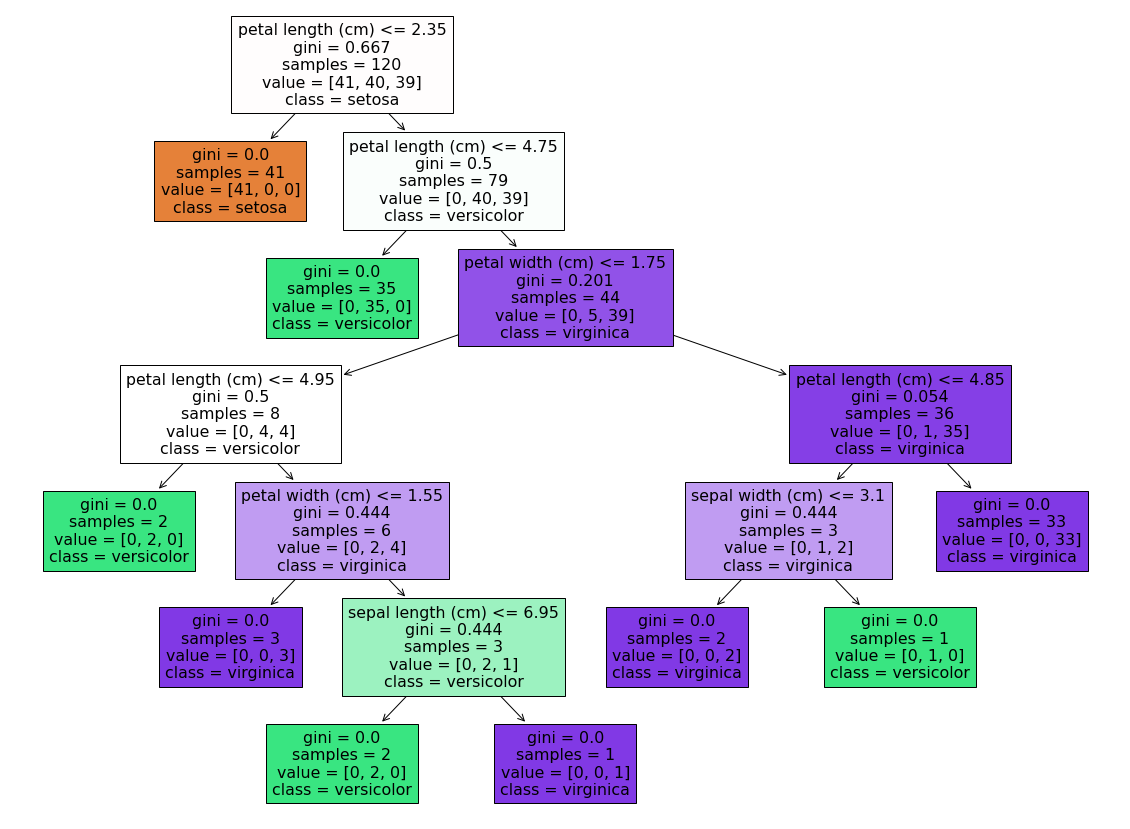

In [27]:
from sklearn.datasets import load_iris
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

iris = load_iris()
X_train, X_test, y_train,  y_test = train_test_split(iris.data, iris.target, test_size=0.2)
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

plt.figure(figsize=(20,15))
tree.plot_tree(dt_clf,filled=True,
               feature_names = iris.feature_names,
               class_names = iris.target_names,)



setosa 품종은 가장 개성이 뚜렷하다.

('sepal length (cm)', 0.030081470649676208)
('sepal width (cm)', 0.0)
('petal length (cm)', 0.9277209108000835)
('petal width (cm)', 0.04219761855024024)


C:\Users\hyeonu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

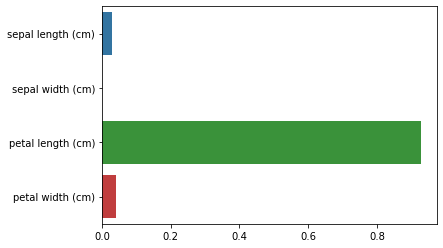

In [26]:
import seaborn as sns
for i in zip(iris.feature_names,dt_clf.feature_importances_):
    print(i)
sns.barplot(dt_clf.feature_importances_,iris.feature_names)

## Q2~Q3. 'dataset/creditcard.csv'를 불러와서 신용카드 사기 검출 분류문제를 아래와 같이 수행하세요(10점)
- 로지스틱 리그레션을 적용한 모델 학습 및 사용자 함수를 이용하여 평가
    - 인자로 입력받은 DataFrame을 복사한 뒤 Time 칼럼만 삭제하고 복사된 df 반환하는 사용자 함수 생성
    - 사전 데이터 가공 후 학습과 테스트 데이터 세트를 반환하는 함수(테스트 사이즈 0.3)
    - 오차행렬, 정확도, 정밀도, 재현율, f1, AUC 평가 함수
    
- 인자로 사이킷런의 Estimator 객체와 학습/테스트 데이터 세트를 입력 받아서  학습/예측/평가 수행
    - 사용자 함수를 사용하여 LightGBM으로 모델을 학습한 뒤 별도의 테스트 데이터 세트에서 예측 평가를 수행. 단, n_estimators=1000, num_leaves=64 적용<br>  ※ 레이블 값이 극도로 불균형한 분포를 가지고 있는 경우 boost_from_average=False로 파라미터 설정(default=True). default 설정은 재현율, AUC 성능을 매우 크게 저하시킴
    - 넘파이의 np.log1p( )를 이용하여 Amount를 로그 변환하는하는 사용자 함수 생성
    - Amount를 로그 변환 후 로지스틱 회귀 및 LightGBM 수행.

### Q2

In [35]:
import pandas as pd
df=pd.read_csv('dataset6/creditcard.csv')

def timedel(df):
    df=df
    df=df.drop('Time',axis=1,inplace=True)
    return df
timedel(df)

In [37]:
def testset(df):
    X=df.drop('Class',axis=1)
    y=df['Class']
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
    return X_train,X_test,y_train,y_test
X_train,X_test,y_train,y_test=testset(df)

In [60]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score,roc_auc_score
from sklearn.linear_model import LogisticRegression
import numpy as np

lr=LogisticRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)
pred_proba=lr.predict_proba(X_test)[:,1]

def est(y_test,pred,pred_proba):
    con=confusion_matrix(y_test,pred)
    acc=accuracy_score(y_test,pred)
    pre=precision_score(y_test,pred)
    rec=recall_score(y_test,pred)
    f1=f1_score(y_test,pred)
    roc=roc_auc_score(y_test,pred_proba)
    print('오차행렬\n',con)
    print('정확도 :',acc)
    print('정밀도 :',pre)
    print('재현율 :',rec)
    print('f1점수:',f1)
    print('roc_auc :',roc)
    
est(y_test,pred,pred_proba)

오차행렬
 [[85277    17]
 [   51    98]]
정확도 : 0.999204147794436
정밀도 : 0.8521739130434782
재현율 : 0.6577181208053692
f1점수: 0.7424242424242424
roc_auc : 0.9497763991361581


C:\Users\hyeonu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Q3

In [73]:
from lightgbm import LGBMClassifier
lgbm=LGBMClassifier(n_estimators=1000, num_leaves=64,boost_from_average=False)
lgbm.fit(X_train, y_train, early_stopping_rounds=100, 
         eval_metric="logloss", eval_set=([(X_test, y_test)]))


C:\Users\hyeonu\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's binary_logloss: 0.598309
[2]	valid_0's binary_logloss: 0.520645
[3]	valid_0's binary_logloss: 0.45588
[4]	valid_0's binary_logloss: 0.401148
[5]	valid_0's binary_logloss: 0.354391
[6]	valid_0's binary_logloss: 0.314123
[7]	valid_0's binary_logloss: 0.279197
[8]	valid_0's binary_logloss: 0.248736
[9]	valid_0's binary_logloss: 0.222047
[10]	valid_0's binary_logloss: 0.198571
[11]	valid_0's binary_logloss: 0.17785
[12]	valid_0's binary_logloss: 0.159506
[13]	valid_0's binary_logloss: 0.143226
[14]	valid_0's binary_logloss: 0.128752
[15]	valid_0's binary_logloss: 0.115851
[16]	valid_0's binary_logloss: 0.104345
[17]	valid_0's binary_logloss: 0.0940564
[18]	valid_0's binary_logloss: 0.0848502
[19]	valid_0's binary_logloss: 0.0766023
[20]	valid_0's binary_logloss: 0.0692126
[21]	valid_0's binary_logloss: 0.0625763
[22]	valid_0's binary_logloss: 0.0566076
[23]	valid_0's binary_logloss: 0.0512501
[24]	valid_0's binary_logloss: 0.0464284
[25]	valid_0's binary_logloss: 0.0420931
[2

LGBMClassifier(boost_from_average=False, n_estimators=1000, num_leaves=64)

In [74]:
pred = lgbm.predict(X_test)
pred_proba = lgbm.predict_proba(X_test)[:,1]

est(y_test,pred,pred_proba)

오차행렬
 [[85285     9]
 [   31   118]]
정확도 : 0.9995318516437859
정밀도 : 0.9291338582677166
재현율 : 0.7919463087248322
f1점수: 0.8550724637681159
roc_auc : 0.9621243726593984


In [91]:
df=pd.read_csv('dataset6/creditcard.csv')
timedel(df)
def testset(df):
    X=df.drop('Class',axis=1)
    X['Amount']=np.log1p(X.Amount)
    y=df['Class']
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
    return X_train,X_test,y_train,y_test
X_train,X_test,y_train,y_test=testset(df)

In [92]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)
pred_proba=lr.predict_proba(X_test)[:,1]
est(y_test,pred,pred_proba)

오차행렬
 [[85273    12]
 [   65    93]]
정확도 : 0.9990988144142879
정밀도 : 0.8857142857142857
재현율 : 0.5886075949367089
f1점수: 0.7072243346007604
roc_auc : 0.9849227051813614


In [93]:
lgbm=LGBMClassifier(n_estimators=1000, num_leaves=64,boost_from_average=False)
lgbm.fit(X_train, y_train, early_stopping_rounds=100, 
         eval_metric="logloss", eval_set=([(X_test, y_test)]))

C:\Users\hyeonu\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's binary_logloss: 0.598336
[2]	valid_0's binary_logloss: 0.520697
[3]	valid_0's binary_logloss: 0.455944
[4]	valid_0's binary_logloss: 0.401219
[5]	valid_0's binary_logloss: 0.354473
[6]	valid_0's binary_logloss: 0.314204
[7]	valid_0's binary_logloss: 0.279281
[8]	valid_0's binary_logloss: 0.248817
[9]	valid_0's binary_logloss: 0.222123
[10]	valid_0's binary_logloss: 0.198644
[11]	valid_0's binary_logloss: 0.177925
[12]	valid_0's binary_logloss: 0.159583
[13]	valid_0's binary_logloss: 0.143314
[14]	valid_0's binary_logloss: 0.128839
[15]	valid_0's binary_logloss: 0.115956
[16]	valid_0's binary_logloss: 0.104445
[17]	valid_0's binary_logloss: 0.0941558
[18]	valid_0's binary_logloss: 0.0849556
[19]	valid_0's binary_logloss: 0.0767274
[20]	valid_0's binary_logloss: 0.0693316
[21]	valid_0's binary_logloss: 0.062696
[22]	valid_0's binary_logloss: 0.0567375
[23]	valid_0's binary_logloss: 0.0513873
[24]	valid_0's binary_logloss: 0.0465745
[25]	valid_0's binary_logloss: 0.0422378
[

LGBMClassifier(boost_from_average=False, n_estimators=1000, num_leaves=64)

In [94]:
pred = lgbm.predict(X_test)
pred_proba = lgbm.predict_proba(X_test)[:,1]
est(y_test,pred,pred_proba)

오차행렬
 [[85277     8]
 [   32   126]]
정확도 : 0.9995318516437859
정밀도 : 0.9402985074626866
재현율 : 0.7974683544303798
f1점수: 0.8630136986301371
roc_auc : 0.9298227536413648


## Q4. Q2 신용카드 사기 검출 분류문제에서 아래를 참고하여 이상치 데이터를 제거하고 모델 학습/예측/평가를 수행하세요(5점)
- 히트맵을 이용해 레이블과의 상관성을 시각화 
- 레이블과 상관성이 높은 피처를 위주로 이상치 검출하는 사용자 함수 생성
- 사용자 함수를 이용하여 이상치 검출
- 이상치 제거 사용자 함수를 이용하여 이상치 제거 후 로지스틱 회귀 및 LightGBM 수행 및 평가

<AxesSubplot:>

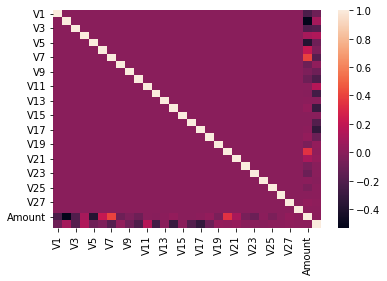

In [97]:
sns.heatmap(df.corr())

In [117]:
df.corr().loc[:,'Class'].abs().sort_values(ascending=False).head(5)

Class    1.000000
V17      0.326481
V14      0.302544
V12      0.260593
V10      0.216883
Name: Class, dtype: float64

C:\Users\hyeonu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='V17'>

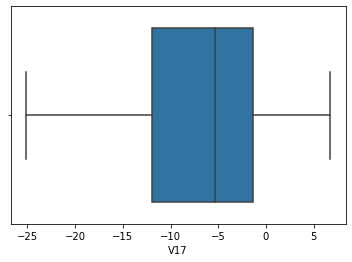

In [115]:
df1=df[df['Class']==1]
sns.boxplot(df1.V17)

C:\Users\hyeonu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='V14'>

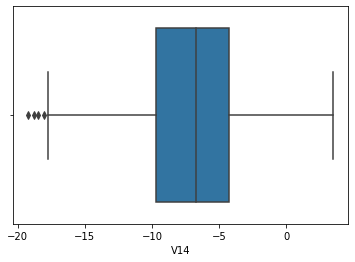

In [116]:
sns.boxplot(df1.V14)

In [172]:
def outline(col):
    df1=df[df['Class']==1]
    a25=df1.describe()[col]['25%']
    a75=df1.describe()[col]['75%']
    pdt=(a75-a25)*1.5
    low=a25-pdt
    upp=a75+pdt
    return df1[(df1[col]>upp)|(df1[col]<low)].index
print(outline('V14'))


Int64Index([8296, 8615, 9035, 9252], dtype='int64')


In [174]:
def remove(df):
    df=df
    df=df.drop(outline('V14'))
    return df

In [179]:
df=pd.read_csv('dataset6/creditcard.csv')
timedel(df)
remove(df)
X_train,X_test,y_train,y_test=testset(df)


In [180]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)
pred_proba=lr.predict_proba(X_test)[:,1]
est(y_test,pred,pred_proba)

오차행렬
 [[85276    13]
 [   65    89]]
정확도 : 0.9990871107053826
정밀도 : 0.8725490196078431
재현율 : 0.577922077922078
f1점수: 0.6953125
roc_auc : 0.9718003098099008


In [181]:
lgbm=LGBMClassifier(n_estimators=1000, num_leaves=64,boost_from_average=False)
lgbm.fit(X_train, y_train, early_stopping_rounds=100, 
         eval_metric="logloss", eval_set=([(X_test, y_test)]))
pred = lgbm.predict(X_test)
pred_proba = lgbm.predict_proba(X_test)[:,1]
est(y_test,pred,pred_proba)

C:\Users\hyeonu\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's binary_logloss: 0.598326
[2]	valid_0's binary_logloss: 0.520667
[3]	valid_0's binary_logloss: 0.455916
[4]	valid_0's binary_logloss: 0.401182
[5]	valid_0's binary_logloss: 0.354432
[6]	valid_0's binary_logloss: 0.314159
[7]	valid_0's binary_logloss: 0.279231
[8]	valid_0's binary_logloss: 0.248776
[9]	valid_0's binary_logloss: 0.222085
[10]	valid_0's binary_logloss: 0.198611
[11]	valid_0's binary_logloss: 0.177895
[12]	valid_0's binary_logloss: 0.159553
[13]	valid_0's binary_logloss: 0.143274
[14]	valid_0's binary_logloss: 0.128798
[15]	valid_0's binary_logloss: 0.115906
[16]	valid_0's binary_logloss: 0.104398
[17]	valid_0's binary_logloss: 0.0941091
[18]	valid_0's binary_logloss: 0.0849027
[19]	valid_0's binary_logloss: 0.0766624
[20]	valid_0's binary_logloss: 0.069269
[21]	valid_0's binary_logloss: 0.0626347
[22]	valid_0's binary_logloss: 0.0566654
[23]	valid_0's binary_logloss: 0.0513158
[24]	valid_0's binary_logloss: 0.0464955
[25]	valid_0's binary_logloss: 0.0421621
[

Q5. SMOTE 오버 샘플링 적용 후 LightGBM 모델을 이용하여 학습, 예측, 평가를 수행하세요.(10점)

In [189]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X,y=smote.fit_resample(X_train, y_train)
lgbm=LGBMClassifier(n_estimators=1000, num_leaves=64,boost_from_average=False)
lgbm.fit(X, y, early_stopping_rounds=100, 
         eval_metric="logloss", eval_set=([(X_test, y_test)]))
pred = lgbm.predict(X_test)
pred_proba = lgbm.predict_proba(X_test)[:,1]
est(y_test,pred,pred_proba)

C:\Users\hyeonu\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's binary_logloss: 0.60375
[2]	valid_0's binary_logloss: 0.529998
[3]	valid_0's binary_logloss: 0.468416
[4]	valid_0's binary_logloss: 0.416208
[5]	valid_0's binary_logloss: 0.371316
[6]	valid_0's binary_logloss: 0.33242
[7]	valid_0's binary_logloss: 0.298472
[8]	valid_0's binary_logloss: 0.268609
[9]	valid_0's binary_logloss: 0.242346
[10]	valid_0's binary_logloss: 0.219285
[11]	valid_0's binary_logloss: 0.198693
[12]	valid_0's binary_logloss: 0.180487
[13]	valid_0's binary_logloss: 0.16412
[14]	valid_0's binary_logloss: 0.149514
[15]	valid_0's binary_logloss: 0.135962
[16]	valid_0's binary_logloss: 0.123889
[17]	valid_0's binary_logloss: 0.113036
[18]	valid_0's binary_logloss: 0.103248
[19]	valid_0's binary_logloss: 0.0944994
[20]	valid_0's binary_logloss: 0.0864253
[21]	valid_0's binary_logloss: 0.079229
[22]	valid_0's binary_logloss: 0.0727552
[23]	valid_0's binary_logloss: 0.066777
[24]	valid_0's binary_logloss: 0.0613515
[25]	valid_0's binary_logloss: 0.0564575
[26]	va

Q6. 사이킷런에서 제공해주는 load_boston 데이터셋을 가져와서 아래 사항을 수행하세요.(10점)
- 데이터셋의 타겟 이름을 'PRICE'로 지정한 후 데이터프레임을 생성 pickle 파일로 저장 후 다시 불어오세요.
- 히트맵을 이용하여 타겟과 상관관계가 높은 독립 변수를 선택하세요.
- 종속변수를 로그 변환하세요
- 위의 사항을 반영하여 선회회귀 모델을 생성 후 평가하고 회귀계수를 출력하세요.

In [296]:
from sklearn.datasets import load_boston
boston = load_boston()
boston
PRICE = boston.target
PRICE = pd.DataFrame({'PRICE':PRICE})
PRICE.to_pickle('price.pkl')
PRICE=pd.read_pickle('price.pkl')
PRICE

,PRICE
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [313]:
boston = load_boston()
df=pd.DataFrame(boston.data,columns=boston.feature_names)
df['PRICE']=PRICE
df

C:\Users\hyeonu\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


<AxesSubplot:>

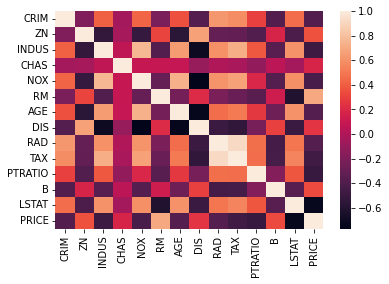

In [314]:
sns.heatmap(df.corr())

In [315]:
cor=df.corr().loc[:,'PRICE'].abs().sort_values(ascending=False).head(7)
cor.index

Index(['PRICE', 'LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX', 'NOX'], dtype='object')

In [316]:
for i in cor.index[1:]:
    df[i]=np.log1p(df[i])

df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,1.196948,0.0,0.430483,2.024853,65.2,4.0900,1.0,5.693732,2.791165,396.90,1.788421,24.0
1,0.02731,0.0,2.088153,0.0,0.384582,2.004314,78.9,4.9671,2.0,5.493061,2.933857,396.90,2.316488,21.6
2,0.02729,0.0,2.088153,0.0,0.384582,2.102303,61.1,4.9671,2.0,5.493061,2.933857,392.83,1.615420,34.7
3,0.03237,0.0,1.156881,0.0,0.377066,2.079192,45.8,6.0622,3.0,5.407172,2.980619,394.63,1.371181,33.4
4,0.06905,0.0,1.156881,0.0,0.377066,2.097650,54.2,6.0622,3.0,5.407172,2.980619,396.90,1.845300,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,2.559550,0.0,0.452985,2.027227,69.1,2.4786,1.0,5.613128,3.091042,391.99,2.367436,22.4
502,0.04527,0.0,2.559550,0.0,0.452985,1.962908,76.7,2.2875,1.0,5.613128,3.091042,396.90,2.310553,20.6
503,0.06076,0.0,2.559550,0.0,0.452985,2.076437,91.0,2.1675,1.0,5.613128,3.091042,396.90,1.893112,23.9
504,0.10959,0.0,2.559550,0.0,0.452985,2.053354,89.3,2.3889,1.0,5.613128,3.091042,393.45,2.012233,22.0


In [317]:
X=df.drop('PRICE',axis=1)
y=df['PRICE']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [435]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
pred = lr.predict(X_test)
lr.coef_

array([-0.01800044, -0.02289482, -0.02066067, -0.0488734 , -0.01330182,
        0.03375996, -0.00374029])

In [319]:
from sklearn.metrics import r2_score
r2_score(y_test,pred)

0.6650870612628457

Q7. house_df.pkl 데이터셋을 불러와서 아래사항을 수행하세요.(15점)
- alphas = [0, 0.1, 1, 10, 100] 를 적용하여 Ridge 회귀 모델링 및 교차 검증 수행 후 5 폴드 평균 RMSE 출력 
- lasso_alphas = [0.07,0.1,0.5,1,3] 를 적용, Lasso 회귀 모델링 및 교차 검증 수행 후 5 폴드 평균 RMSE 출력(def get_linear_reg_eval(model_name,params=None,X_data_n=None, y_target_n=None, verbose=True 사용자 함수 이용) 
- elastic_alphas = [0.07,0.1,0.5,1,3] 를 적용, ElasticNet 회귀 모델링 및 교차검증 후 5 폴드 평균 RMSE를 출력(사용자 함수 이용)

In [280]:
df=pd.read_pickle('dataset6/house_df.pkl')
df              

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [285]:
X=df.drop('PRICE',axis=1)
y=df['PRICE']

In [286]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
alphas = [0,0.1,1,10,100]
for alpha in alphas:
    ridge = Ridge(alpha = alpha)
    neg_mse_scores = cross_val_score(ridge, X, y, scoring="neg_mean_squared_error", cv=5)
    rmse_scores = np.round(np.sqrt(-1 * neg_mse_scores), 2)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print(f'alpha: {alpha}\n평균 RMSE: {avg_rmse:.3f}\n')


alpha: 0
평균 RMSE: 5.829

alpha: 0.1
평균 RMSE: 5.788

alpha: 1
평균 RMSE: 5.653

alpha: 10
평균 RMSE: 5.518

alpha: 100
평균 RMSE: 5.330



In [321]:
from sklearn.linear_model import Lasso, ElasticNet

# alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환 
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, 
                        verbose=True, return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbose : print('####### ', model_name , '#######')
    for param in params:
        if model_name =='Ridge': model = Ridge(alpha=param)
        elif model_name =='Lasso': model = Lasso(alpha=param)
        elif model_name =='ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, 
                                             y_target_n, scoring="neg_mean_squared_error", cv = 5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f} '.format(param, avg_rmse))
        # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
        
        model.fit(X_data_n , y_target_n)
        if return_coeff:
            # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가. 
            coeff = pd.Series(data=model.coef_ , index=X_data_n.columns )
            colname='alpha:'+str(param)
            coeff_df[colname] = coeff
    
    return coeff_df



In [323]:
lasso_alphas = [ 0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df =get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=X, y_target_n=y)

#######  Lasso #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.003 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.010 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.351 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.826 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 7.976 


In [324]:
elastic_alphas = [ 0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df =get_linear_reg_eval('ElasticNet', params=elastic_alphas,
                                      X_data_n=X, y_target_n=y)

#######  ElasticNet #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 4.896 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 4.995 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 6.052 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 6.847 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 7.922 


Q8. load_boston 데이터셋을 불러와서 다음사항을 수행하세요.
- SVM 알고리즘을 활용한 주택가격 예측모델 생성 및 평가(MSE, RMSE, R2)
- 개발된 예측모델을 활용하여 아래 test_data가 주어졌은때의 주택가격 예측<br>
test_data = [3.7, 0, 18.4, 1, 0.87, 5.95, 91, 2.5052, 26, 666, 20.2, 351.34, 15.27]

In [333]:

from sklearn import datasets
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
import numpy as np
import warnings
warnings.filterwarnings('ignore')

data = datasets.load_boston()
X, y = shuffle(data.data,data.target,random_state=7)
num_training = int(0.8 * len(X))
X_train, y_train = X[:num_training], y[:num_training]
X_test, y_test = X[num_training:],y[num_training:]

svr = SVR(kernel='linear', C=1.0, epsilon=0.1)
svr.fit(X_train,y_train)
y_pred = svr.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)

print(f'mse:{mse:.3f}','\n')
print(f'rmse:{rmse:.3f}','\n')
print(f'r2_score:{r2_score(y_test,y_pred):.3f}')



mse:15.377 

rmse:3.921 

r2_score:0.813


array([[6.28807e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.18010e+02, 1.77900e+01],
       [9.37800e-02, 1.25000e+01, 7.87000e+00, ..., 1.52000e+01,
        3.90500e+02, 1.57100e+01],
       [1.14600e-01, 2.00000e+01, 6.96000e+00, ..., 1.86000e+01,
        3.94960e+02, 7.73000e+00],
       ...,
       [8.40540e-01, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.03420e+02, 1.65100e+01],
       [4.01100e-02, 8.00000e+01, 1.52000e+00, ..., 1.26000e+01,
        3.96900e+02, 4.08000e+00],
       [6.66400e-02, 0.00000e+00, 4.05000e+00, ..., 1.66000e+01,
        3.90960e+02, 5.33000e+00]])

In [343]:
test_data = [3.7, 0, 18.4, 1, 0.87, 5.95, 91, 2.5052, 26, 666, 20.2, 351.34, 15.27]
print(svr.predict([test_data]))


[18.52178011]


Q9. mtcars 데이터셋(mtcars.csv)의 qsec 컬럼을 최소최대 척도(Min-Max Scale)로 변환한 후 0.5보다 
큰 값을 가지는 레코드 수를 구하시오

In [332]:
df=pd.read_csv('dataset6/mtcars.csv')
df

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [355]:
from sklearn.preprocessing import MinMaxScaler
mmc = MinMaxScaler()
mmc.fit(df[['qsec']])
df.qsec = mmc.transform(df[['qsec']])
len(df[df['qsec']>0.5])

9

Q10. purdata.csv는 백화점 고객의 1년 간 구매 데이터이다. 아래사항을 수행하세요.
 
- 남성고객을 분류하는 모델을 생성(분류알고리즘 : dt,rf,lr)
- 모델 성능을 roc_auc로 평가 

In [401]:
df=pd.read_csv('dataset6/purdata.csv')
X=df.drop(['cust_id','주구매상품','주구매지점','gender'],axis=1)
y=df.gender

X = X.replace('*',0)
X['환불금액'].fillna(0,inplace=True)
from sklearn.preprocessing import StandardScaler
for i in X.columns:
    sc = StandardScaler()
    sc.fit(X[[i]])
    X[i] = sc.transform(X[[i]])

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)

In [432]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train , y_train)
pred = dt_clf.predict(X_test)
pred_proba = dt_clf.predict_proba(X_test)[:,1]
est(y_test,pred,pred_proba)


from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
pred_proba = rf_clf.predict_proba(X_test)[:,1]
est(y_test,pred,pred_proba)

lr_clf=LogisticRegression()
lr_clf.fit(X_train,y_train)
pred=lr_clf.predict(X_test)
pred_proba=lr_clf.predict_proba(X_test)[:,1]
est(y_test,pred,pred_proba)

오차행렬
 [[273 170]
 [142 115]]
정확도 : 0.5542857142857143
정밀도 : 0.40350877192982454
재현율 : 0.4474708171206226
f1점수: 0.4243542435424354
roc_auc : 0.5330607548462464
오차행렬
 [[332 111]
 [174  83]]
정확도 : 0.5928571428571429
정밀도 : 0.42783505154639173
재현율 : 0.3229571984435798
f1점수: 0.3680709534368071
roc_auc : 0.5749707951620978
오차행렬
 [[418  25]
 [232  25]]
정확도 : 0.6328571428571429
정밀도 : 0.5
재현율 : 0.09727626459143969
f1점수: 0.16286644951140067
roc_auc : 0.6237933790656208
